<a href="https://colab.research.google.com/github/heduardabolini/trabalho02_PDI/blob/main/Trabalho_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instruções

1. Resolva todos os exercícios abaixo.
2. Salve uma cópia desse notebook em um repositório no GitHub.
3. Envie o link do repositório criado para o professor.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1. Restauração de imagens usando a Transformada Rápida de Fourier

 A Transformada Rápida de Fourier converte uma image do domínio do espaço para uma representação no domínio da frequência. 
 
 Faça uma análise das frequências obtidas para a [imagem](https://drive.google.com/file/d/1Udgllcno-XQOfE1RrIXGuiCopFYhn0pR/view?usp=sharing) abaixo e, utilizando uma máscara apropriada, remova as frequências indesejadas para remover o ruído.

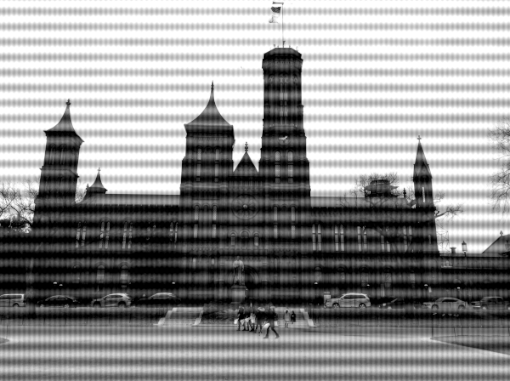

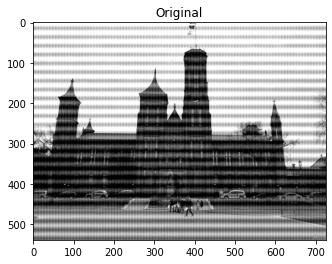

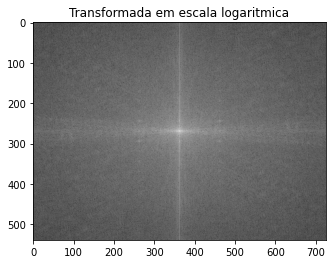

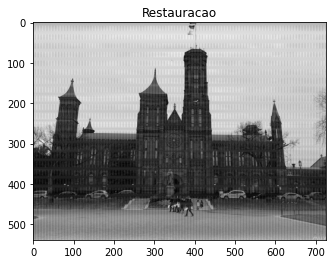

In [4]:
from matplotlib import pyplot as plt
from scipy import fftpack as fp
import numpy as np
import cv2

#carregando a imagem
imagem = cv2.imread('/content/drive/MyDrive/ProcessamentoDigitaldeImagens/castelo.jpg', 0)

#pegando as dimensoes da imagem
width, height = imagem.shape 
img = np.zeros((width, height))

x = height//2

#definindo o raio do circulo maior
raio = 264 

#definindo o circulo mais externo
cv2.circle(img,(height//2,width//2), raio, 1, -1) 

#removendo as frequencias de dentro do circulo
cv2.line(img,(x,x-80),(x,x+raio), 0, 2)
cv2.line(img,(x,x-100),(x,x-raio-100), 0, 2)

#colormap(escala de cinza)
cmap='gray'

#plotando a imagem original
plt.figure()
plt.title('Original')
plt.imshow(imagem, cmap=cmap)

#aplicando o filtro passa-baixa
img = fp.fftshift(img)
F = fp.fft2(imagem)

#aplicando a transformada rapida de fourier  
Ft = np.absolute(F)
Ft /= Ft.max()
Ft = fp.fftshift(Ft)
Ft = np.log(Ft)

#mostrando a transformada em escala logaritmica
plt.figure()
plt.title('Transformada em escala logaritmica')
plt.imshow(Ft, cmap=cmap)

#aplicando o filtro
filtro = F*img

#obtendo a transformada inversa
f_blurred = fp.ifft2(filtro)
f_blurred = np.absolute(f_blurred)

#plotando a imagem restaurada
plt.figure()
plt.title('Restauracao')
plt.imshow(f_blurred, cmap=cmap)


#2. Erosão e Dilatação

Crie duas funções chamadas videoErosao e videoDilatacao.

A função videoErosao() receberá uma imagem em preto e branco como a apresentada abaixo e deverá aplicar a operação de erosão sucessivamente, até ela desaparecer. Faça um vídeo que aplique essa operação aos poucos, em formato de animação.

Realize procedimento semelhante para videoDilatacao(), porém fazendo o oposto da operação de dilatação.

OBS: <a href="https://docs.opencv.org/3.4/db/df6/tutorial_erosion_dilatation.html">Esse texto deverá ajudar</a>.

E para gerar o vídeo, <a href="https://colab.research.google.com/drive/1sQAxhv5nIWDvwt82osa2x41zVtUFyx1O?usp=sharing">clique aqui</a>.

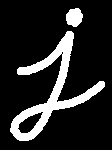

In [ ]:
#OBSERVAÇÃO: Funcionando no terminal

import cv2
import numpy as np

def erosao(imagem,i):
	kernel = np.ones((i,i),np.uint8)
	erosion = cv2.erode(imagem,kernel,iterations=1)
	return erosion

def dilatacao(imagem, i):
	kernel = np.ones((i,i),np.uint8)
	dilatada =cv2.dilate(imagem, kernel, iterations = 1)
	return dilatada

#carregando a imagem
imagem = cv2.imread

#gerando os vídeos de saída, para a função dilatação e erosão
fourcc = cv2.VideoWriter_fourcc('X','V','I','D')
outErosao = cv2.VideoWriter("VideoErosao.avi", fourcc, 20.0, (640, 480))
outDilatacao = cv2.VideoWriter("VideoDilatacao.avi", fourcc, 20.0, (640, 480))

for i in range (1,92):

	#chamando a função dilatação
	frameDilatacao = dilatacao(imagem, i)

	#redimensionando o tamanho da imagem
	newFrameDilatacao = cv2.resize(frameDilatacao, (640, 480), interpolation = cv2.INTER_AREA)

	#escrevendo no arquivo
	outDilatacao.write(newFrameDilatacao)

	#chamando a função erosao
	frameErosao = erosao(imagem, i)

	#redimensionando o tamanho da imagem
	newFrameErosao = cv2.resize(frameErosao, (640, 480), interpolation = cv2.INTER_AREA)
	
	#escrevendo no arquivo
	outErosao.write(newFrameErosao)

#fechando
outDilatacao.release()
outErosao.release()

Links para os vídeos:

https://github.com/heduardabolini/videosPDI

#3. Detecção de linhas usando a Transformada de Hough

A Transformada de Hough é uma técnica que auxilia na detecção de formas geométricas em imagens digitais. 

Nesta aplicação, você deverá identificar as linhas que limitam uma via para que um carro autônomo possa seguir em tempo real. Devido a mudanças de iluminação, será necessário utilizar a transformada de Hough para conectar retas desconectadas. Utilize o seguinte [vídeo](https://drive.google.com/file/d/1G33NiG3rQuec-1hC-FshmjhLWiU1bGtO/view?usp=sharing) como entrada do algoritmo. O resultado de um frame deve ser como a imagem abaixo.

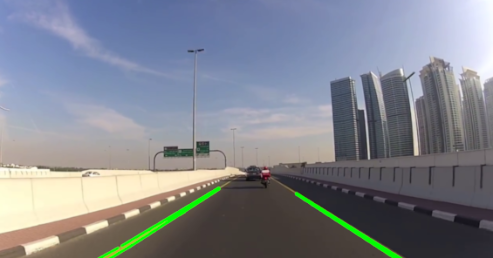

In [ ]:
#OBSERVAÇÃO: Funcionando no terminal

import cv2
import numpy as np

#carregando vídeo
video = cv2.VideoCapture("road_car_view.mp4")
points = []

#executando até o usuário fechar
while (True):

	#lendo cada quadro do vídeo e carregando em frame
    _,frame = video.read()
    dst = np.copy(frame)
    x = 800
    y = x*0.4

    #transformando o frame em HSV
    frameHSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    mini = np.array([20, 55, 119])
    maxi = np.array([24, 255, 255])

    mascara = cv2.inRange(frameHSV, mini, maxi)

    edges = cv2.Canny(mascara, x,y)

    #usando a transformada de Hough
    linhas = cv2.HoughLinesP(edges, 2, np.pi/180.0, 50, minLineLength=35, maxLineGap=10)

    for linhas in linhas:
        x1, y1, x2, y2 = linhas[0]
        cv2.line(dst, (x1,y1), (x2,y2), (0,255,0), 3)

    cv2.imshow("Linhas", edges)
    cv2.imshow("Resultado", dst)
    
   
    if cv2.waitKey(25) & 0xFF == ord('q'):
       break

cv2.destroyAllWindows()

#4. Segmentação de Imagens com K-Means

Quando falamos de segmentação de imagens, dizemos que vamos localizar segmentos das imagens. Um algoritmo que realiza essa tarefa é o K-Means.

No vídeo abaixo é apresentado como usar esse algoritmo para fazer quantização de imagens, ou seja, representar as cores originais em menos quantidades.

Dito isso, assista o vídeo abaixo e implemente um algoritmo que transforma qualquer imagem em um gráfico para jogo 8 bits. Assim, pegue uma imagem e gere ela novamente com apenas 256 cores usando o K-means.

<a href="https://www.youtube.com/watch?v=iHlve4t5z-0"><img src="https://img.youtube.com/vi/iHlve4t5z-0/mqdefault.jpg"/></a>

OBS: O algoritmo K-means é discutido em mais detalhes nos vídeos abaixo.

<a href="https://www.youtube.com/watch?v=2hsMErlQtcI"><img src="https://img.youtube.com/vi/2hsMErlQtcI/mqdefault.jpg"/></a>
<a href="https://www.youtube.com/watch?v=p2twwtegYkU"><img src="https://img.youtube.com/vi/p2twwtegYkU/mqdefault.jpg"/></a>

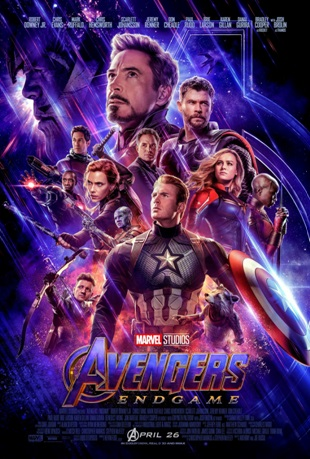

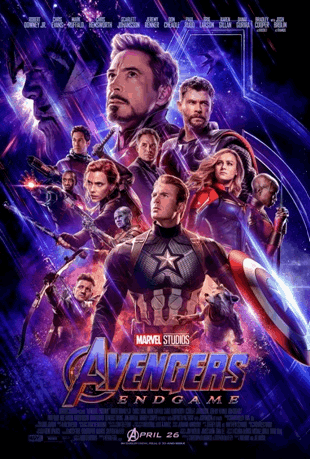

In [5]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2

#função kmeans
def computeKmeans(imagem):

	#mudando a altura e largura da matriz antiga para a matriz nova 
	matriz = imagem.reshape((-1,3))
	matriz = np.float32(matriz)

	#critério para interromper o Kmeans
	criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.1)

	#quantidade de cores
	K = 256

	#chamando o K-means
	_, labels, centroides = cv2.kmeans(matriz, K, None, criteria, 20, cv2.KMEANS_RANDOM_CENTERS)

	#aplicando as cores que estão no centroide na imagem de acordo com o pixel
	centroides = np.uint8(centroides)
	imagemComCentroides = centroides[labels.flatten()]
	imagemFinal = imagemComCentroides.reshape((imagem.shape))

	cv2_imshow(imagem)
	cv2_imshow(imagemFinal)


#função main
if __name__ == "__main__":
	
	#carregando a imagem
	imagem = cv2.imread('/content/drive/MyDrive/ProcessamentoDigitaldeImagens/avengers.jpg')
	computeKmeans(imagem)

#5. Segmentação usando o algoritmo GrabCut

Quando o assunto é obter o segmento exato que contém um objeto, o algoritmo GrabCut é excelente.



Nos vídeos abaixos há exemplos de sua implementação. 

<a href="https://www.youtube.com/watch?v=HBp6vQXFQgc"><img src="https://img.youtube.com/vi/HBp6vQXFQgc/mqdefault.jpg"/></a>
<a href="https://www.youtube.com/watch?v=DyRfAIQfVug"><img src="https://img.youtube.com/vi/DyRfAIQfVug/mqdefault.jpg"/></a>

Baseado nisso e nos conhecimentos anteriores, crie um algoritmo que segmente sua imagem e adicione por cima do fundo o efeito de borramento, usando um dos filtros explicados em lições passadas.

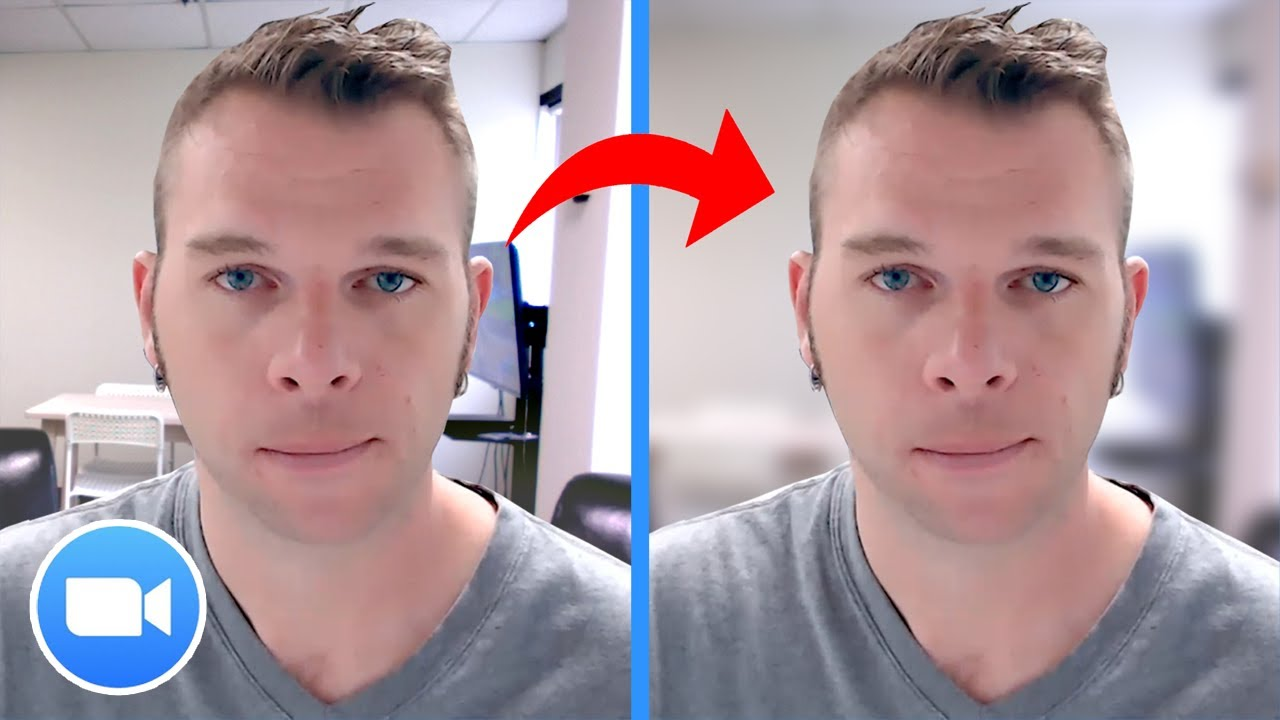

In [ ]:
#OBSERVAÇÃO: Funcionando no terminal

from tkinter import *
from PIL import Image
from PIL import ImageTk
from tkinter import filedialog
import cv2
import numpy as np

class GrabCutGUI(Frame):

    def __init__(self, master = None):

        #invocando o construtor da classe pai Frame
        Frame.__init__(self, master)

        #inicializando a interface gráfica
        self.iniciaUI()

    def iniciaUI(self):

        #preparando a janela
        self.master.title("Imagem Segmentada")
        self.pack()

        #computando as ações de mouse
        self.acoesDoMouse()

        #carregando a imagem do disco
        self.imagem, self.imagemblur = self.carregaImagem()

        #criando um canvas que receberá a imagem
        self.canvas = Canvas(self.master, width = self.imagem.width(), height = self.imagem.height(), cursor = "cross")

        #desenhando a imagem que foi carregada no canvas
        self.canvas.create_image(0, 0, anchor = NW, image = self.imagem)

        #para não remover a imagem pelo garbage collector
        self.canvas.image = self.imagem 

        #posicionando todos os elementos no canvas
        self.canvas.pack()

    #definição da função que faz as ações do mouse
    def acoesDoMouse(self):

        self.startX = None
        self.startY = None
        self.rect   = None
        self.rectangleReady = None

        self.master.bind("<ButtonPress-1>", self.botaoPressionado)
        self.master.bind("<B1-Motion>", self.botaoPressionadoEmMovimento)
        self.master.bind("<ButtonRelease-1>", self.botaoSolto)


    #função de transformação, aplicando o grabcut e borrando a imagem
    def botaoSolto(self, event):

        if self.rectangleReady:

            #criando uma nova janela
            windowGrabcut = Toplevel(self.master)
            windowGrabcut.wm_title("Segmentação")
            windowGrabcut.minsize(width = self.imagem.width(), height = self.imagem.height())

            #criando um canvas para essa nova janela
            canvasGrabcut = Canvas(windowGrabcut, width = self.imagem.width(), height = self.imagem.height())
            canvasGrabcut.pack()

            #aplicando o grabcut na imagem
            mask = np.zeros(self.imagemOpenCV.shape[:2], np.uint8)
            rectGcut = (int(self.startX), int(self.startY), int(event.x - self.startX), int(event.y - self.startY))
            fundoModel = np.zeros((1, 65), np.float64)
            objModel = np.zeros((1, 65), np.float64)

            #invocando o grabcut
            cv2.grabCut(self.imagemOpenCV, mask, rectGcut, fundoModel, objModel, 5, cv2.GC_INIT_WITH_RECT)
            mascaraFinal = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
            imagemFinal = self.imagemOpenCV * mascaraFinal[:,:,np.newaxis]

            #convertendo o formato PhotoImage para PIL
            imgBlur = ImageTk.getimage(self.imagemblur)

            #convertendo do formato PIL para OPENCV
            self.opencvImageblur = cv2.cvtColor(np.array(imgBlur), cv2.COLOR_RGB2BGR)
            for x in range(0, self.imagemOpenCV.shape[1]):
                for y in range(0, self.imagemOpenCV.shape[0]):
                    if(mascaraFinal[y][x] == 0):
                        imagemFinal [y][x][0] = self.opencvImageblur[y][x][0]
                        imagemFinal [y][x][1] =  self.opencvImageblur[y][x][1]
                        imagemFinal[y][x][2] =  self.opencvImageblur[y][x][2]

            #convertendo de volta do opencv pra Tkinter
            imagemFinal = cv2.cvtColor(imagemFinal, cv2.COLOR_BGR2RGB)
            imagemFinal = Image.fromarray(imagemFinal)
            imagemFinal = ImageTk.PhotoImage(imagemFinal)

            #inserindo a imagem segmentada no canvas
            canvasGrabcut.create_image(0, 0, anchor = NW, image = imagemFinal)
            canvasGrabcut.image = imagemFinal

    def botaoPressionadoEmMovimento(self, event):
    
        currentX = self.canvas.canvasx(event.x)
        currentY = self.canvas.canvasy(event.y)

        #atualizando o retângulo a ser desenhado
        self.canvas.coords(self.rect, self.startX, self.startY, currentX, currentY)

        #verificando se existe retângulo desenhado
        self.rectangleReady = True


    def botaoPressionado(self, event):

        #convertendo o x do frame, pro x do canvas e copiando isso em startX
        self.startX = self.canvas.canvasx(event.x)
        self.startY = self.canvas.canvasy(event.y)

        if not self.rect:
            self.rect = self.canvas.create_rectangle(0, 0, 0, 0, outline="red")

    #definição da função que carrega a imagem
    def carregaImagem(self):

        caminhoDaImagem = filedialog.askopenfilename()

        #só entra no if se a imagem existir
        if(caminhoDaImagem != None):

            #convertendo de opencv para o formato PhotoImage
            self.imagemOpenCV = cv2.imread(caminhoDaImagem)
            image = cv2.cvtColor(self.imagemOpenCV, cv2.COLOR_BGR2RGB)
            imagemBlur = cv2.blur(image,(20,20))

            #convertendo de OpenCV pra PIL
            image = Image.fromarray(image)
            imagemBlur = Image.fromarray(imagemBlur)

            #convertendo de PIL pra PhotoImage
            image = ImageTk.PhotoImage(image)
            imagemBlur = ImageTk.PhotoImage(imagemBlur)
            return [image, imagemBlur]


def main():
    #inicializando a Tkinter
    root = Tk()

    #criando a aplicação
    appcut = GrabCutGUI(master = root)

    #criando o loop do programa
    appcut.mainloop()

if __name__ == "__main__":
    main()